# PyCon 2018: Using pandas for Better (and Worse) Data Science

### GitHub repository: https://github.com/justmarkham/pycon-2018-tutorial

### Instructor: Kevin Markham

- GitHub: https://github.com/justmarkham
- Twitter: https://twitter.com/justmarkham
- YouTube: https://www.youtube.com/dataschool
- Website: http://www.dataschool.io

In [18]:
import pandas as pd
pd.__version__
from ds_utils.ds_preamble import *
from ds_utils.ds_plotting import *
from ds_utils.ds_helper import *
import duckdb

'1.4.0'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset: Stanford Open Policing Project  ([video](https://www.youtube.com/watch?v=hl-TGI4550M&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=1))

https://openpolicing.stanford.edu/

In [3]:
# ri stands for Rhode Island
ri = pd.read_csv('police.csv')

In [4]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [5]:
# what does each row represent?
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [6]:
# what do these numbers mean?
ri.shape

(91741, 15)

In [7]:
# what do these types mean?
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

- What does NaN mean?
- Why might a value be missing?
- Why mark it as NaN? Why not mark it as a 0 or an empty string or a string saying "Unknown"?

In [8]:
# what are these counts? how does this work?
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [9]:
(True == 1) and (False == 0)

True

## 1. Remove the column that only contains missing values ([video](https://www.youtube.com/watch?v=TW5RqdDBasg&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=2))

In [148]:
ri = ri.drop(ri.isna().mean()[lambda x: x==1].index, axis=1) 
# ri.isna().mean()[lambda x: x==1].index

In [24]:
# Q2
ri.query("violation == 'Speeding'").driver_gender.value_counts(normalize=True)
ri.groupby('driver_gender').violation.value_counts()
ri.groupby(['driver_gender', 'violation']).size()


# sql
# q = """SELECT driver_gender, count(*) FROM ri p WHERE violation = 'Speeding' GROUP BY driver_gender"""
# duckdb.query(q).df()

# q = """SELECT driver_gender, violation,  count(*) FROM ri p GROUP BY driver_gender, violation ORDER BY driver_gender, violation"""
# duckdb.query(q).df()

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

driver_gender  violation          
F              Speeding               15482
               Moving violation        3204
               Equipment               2487
               Registration/plates     1013
               Other                    690
               Seat belt                635
M              Speeding               32979
               Moving violation       13020
               Equipment               8533
               Other                   3627
               Registration/plates     2419
               Seat belt               2317
Name: violation, dtype: int64

driver_gender  violation          
F              Equipment               2487
               Moving violation        3204
               Other                    690
               Registration/plates     1013
               Seat belt                635
               Speeding               15482
M              Equipment               8533
               Moving violation       13020
               Other                   3627
               Registration/plates     2419
               Seat belt               2317
               Speeding               32979
dtype: int64

,driver_gender,count_star()
0,M,32979
1,F,15482
2,NaN,2


,driver_gender,violation,count_star()
0,NaN,NaN,5333
1,NaN,Speeding,2
2,F,Equipment,2487
3,F,Moving violation,3204
4,F,Other,690
5,F,Registration/plates,1013
6,F,Seat belt,635
7,F,Speeding,15482
8,M,Equipment,8533
9,M,Moving violation,13020


In [28]:
# Q3 
ri.groupby('driver_gender').search_conducted.mean()

# one more factor
ri.groupby(['driver_gender', 'violation']).search_conducted.mean()

# q = """SELECT driver_gender, violation, avg(cast(search_conducted AS integer)) FROM ri p GROUP BY driver_gender , violation ORDER BY driver_gender , violation"""
# duckdb.query(q).df()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

driver_gender  violation          
F              Equipment              0.042622
               Moving violation       0.036205
               Other                  0.056522
               Registration/plates    0.066140
               Seat belt              0.012598
               Speeding               0.008720
M              Equipment              0.070081
               Moving violation       0.059831
               Other                  0.047146
               Registration/plates    0.110376
               Seat belt              0.037980
               Speeding               0.024925
Name: search_conducted, dtype: float64

In [151]:
# Q4
# ri.search_type.value_counts_plus()
# ri.search_conducted.value_counts_plus()

ri[ri.search_type.isna()].search_conducted.value_counts() # all nan search types have false search conducted

ri[ri.search_conducted.eq(False)].search_type.value_counts(dropna=False)

ri[ri.search_conducted.eq(True)].search_type.isna().mean()

False    88545
Name: search_conducted, dtype: int64

NaN    88545
Name: search_type, dtype: int64

0.0

In [152]:
# Q5
# ri.filter(like='search')
# ri.search_type.value_counts()[lambda df: df.index.str.contains('frisk', case=False)]

ri.search_type.str.contains('frisk', case=False)




0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
91736    NaN
91737    NaN
91738    NaN
91739    NaN
91740    NaN
Name: search_type, Length: 91741, dtype: object

In [153]:
# Q6
date_time = ri.stop_date.str.cat(ri.stop_time, sep=' ')
date_time
# date_time = pd.to_datetime(ri.stop_date + " " + ri.stop_time) # M2 
ri['date_time'] = pd.to_datetime(date_time)

0        2005-01-02 01:55
1        2005-01-18 08:15
2        2005-01-23 23:15
3        2005-02-20 17:15
4        2005-03-14 10:00
               ...       
91736    2015-12-31 20:27
91737    2015-12-31 20:35
91738    2015-12-31 20:45
91739    2015-12-31 21:42
91740    2015-12-31 22:46
Name: stop_date, Length: 91741, dtype: object

In [154]:
ri.date_time.dt.year.value_counts()
# ri.groupby(ri.date_time.dt.year).size() # same as above. But less fast!

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: date_time, dtype: int64

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='date_time'>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='date_time'>

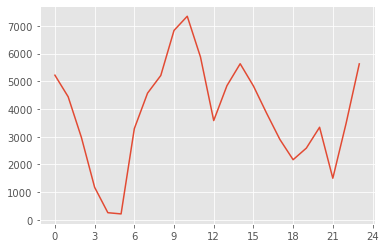

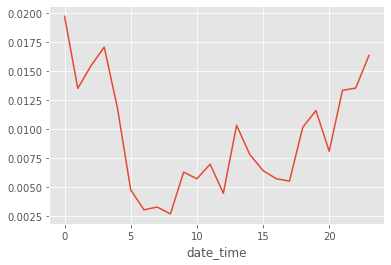

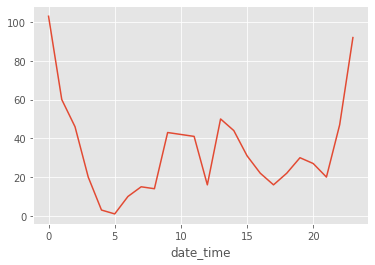

In [155]:
_ = ri.date_time.dt.hour.value_counts().sort_index().plot().set(xticks=range(0,25,3)) # search in each hour

plt.figure()
ri.groupby(ri.date_time.dt.hour).drugs_related_stop.mean().plot() # by mean 

plt.figure()
ri.groupby(ri.date_time.dt.hour).drugs_related_stop.sum().plot() # by sum

<AxesSubplot:>

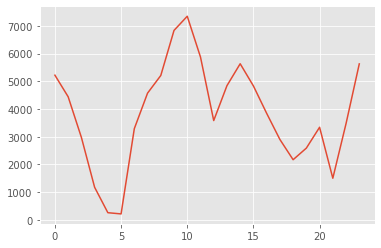

In [156]:
# Q8
ri.date_time.dt.hour.value_counts().sort_index().plot()


In [174]:
# Q9
# ri.query('stop_duration in ["2","1"]').stop_duration = np.nan # not work, SettingWithCopyWarning

# ri[ri.stop_duration.isin(['2','1'])].stop_duration = np.nan # not work

ri.loc[ri.stop_duration.isin(['2','1']), 'stop_duration'] = np.nan # ok

ri.stop_duration.replace(['2','1'], np.nan, inplace=True) # also ok. recommended

# sanity check
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

In [181]:
# Q10
# ri.violation_raw.value_counts()
# ri.stop_duration.value_counts()
# ri.groupby('violation_raw').stop_duration
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

# ri.stop_duration.replace(mapping).value_counts(dropna=False)

ri['stop_minutes'] = ri.stop_duration.replace(mapping)

In [197]:
ri.groupby('violation_raw').stop_minutes.agg(['mean', 'size'])

,mean,size
violation_raw,,
APB,20.987342,79
Call for Service,22.034669,1298
Equipment/Inspection Violation,11.460345,11020
Motorist Assist/Courtesy,16.916256,203
Other Traffic Violation,13.900265,16224
Registration Violation,13.745629,3432
Seatbelt Violation,9.741531,2952
Special Detail/Directed Patrol,15.061100,2455
Speeding,10.577690,48463


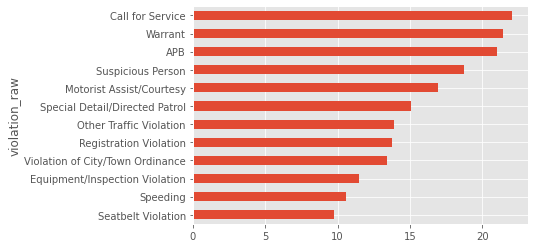

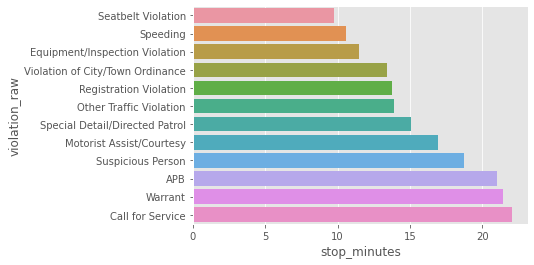

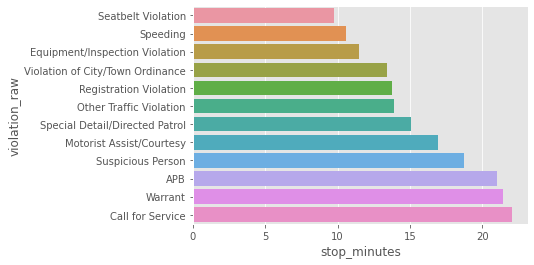

In [256]:
# Q11
temp = ri.groupby('violation_raw').stop_minutes.mean().sort_values()
# temp
temp.plot.barh()

plt.figure()
sns.barplot(y=temp.index, x=temp)

plt.figure()
# sns.barplot(data=ri, y='violation_raw', x='stop_minutes', ci=None, order=ri.violation_raw.sort_values().unique())
sns.barplot(data=ri, y='violation_raw', x='stop_minutes', ci=None, order=ri.groupby('violation_raw').stop_minutes.mean().sort_values().index);

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='violation', ylabel='driver_age'>

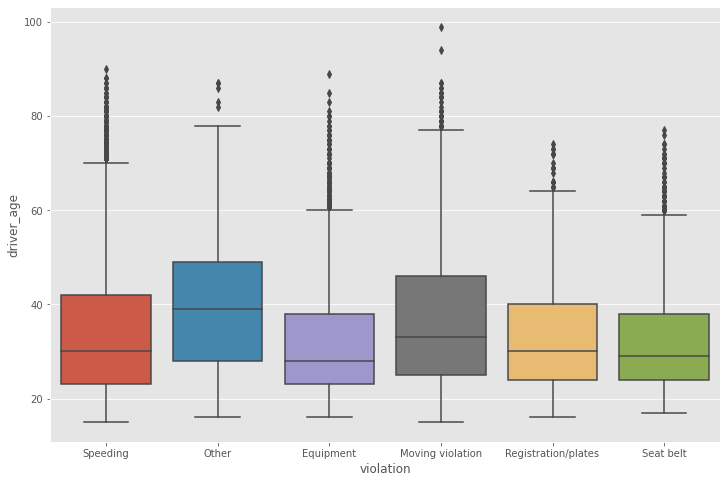

In [275]:
# ri.violation
# ri.filter(like='age')
# ri.groupby('violation').driver_age.mean()

plt.figure(figsize=(12,8))
sns.boxplot(data=ri, x='violation', y='driver_age')
# sns.histplot(data=ri, hue='violation', x='driver_age', bins=30, common_norm=True)


<AxesSubplot:ylabel='Frequency'>

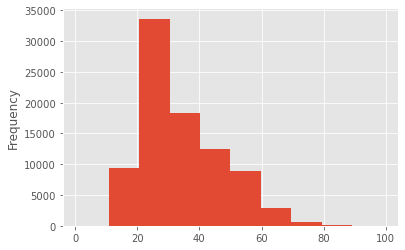

In [315]:
# (datetime.date.today().year- ri.driver_age_raw).astype(int)

new_age = ri.date_time.dt.year - ri.driver_age_raw


# new_age.median()

new_age[(new_age<=0)  |  (new_age >100)] = new_age.median()

new_age.plot.hist()


# ri['driver_age'].hist()
# plt.figure()
# new_age.hist()
# new_age

# ri.driver_age_raw.describe()
# ri.date_time.dt.year.describe()

# ri.driver_age_raw.sort_values()

# age = datetime.date.today().year- ri.driver_age_raw
# age.isna().sum()




In [235]:
ri.violation_raw.sort_values().unique()

array(['APB', 'Call for Service', 'Equipment/Inspection Violation',
       'Motorist Assist/Courtesy', 'Other Traffic Violation',
       'Registration Violation', 'Seatbelt Violation',
       'Special Detail/Directed Patrol', 'Speeding', 'Suspicious Person',
       'Violation of City/Town Ordinance', 'Warrant', nan], dtype=object)